# presented by : Vidya Bandgar

# Data Science and Business Analyst Internship

# Task 02: Prediction using Unsupervised ML

# To Do:
               From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


# Language used: Python

# Algorithm used: K-Means Clustering

# Importing required Libraries and Dataset

In [3]:
#using the inline backend
import numpy as np #useful for many scientific computing in Python
import pandas as pd #primary data structure library
import matplotlib.pyplot as plt #To perform graphical plot of the data
%matplotlib inline
import seaborn as sns # statistical graphics
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Reading the data set.

In [6]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# To see what the data set looks like, we'll use the head() method.
# first 5 records from the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
# checking for the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# Checking the shape of the dataset
df.shape

(150, 6)

# The shape of the dataset given shows that it has 150 rows and 6 columns.

In [12]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [14]:
# duplicate columns
df.duplicated().sum()

0

In [15]:
# checking total number of records for each species
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Visualisation of dataset.

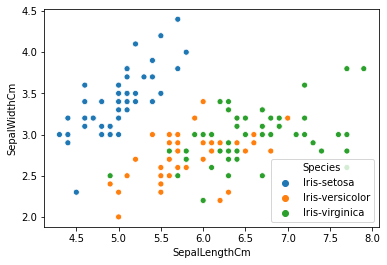

In [16]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data=df, hue='Species')

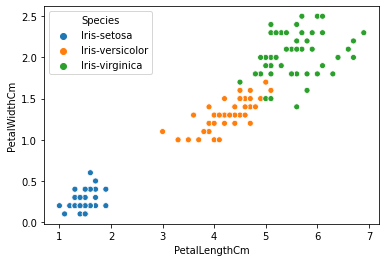

In [17]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data=df, hue='Species')

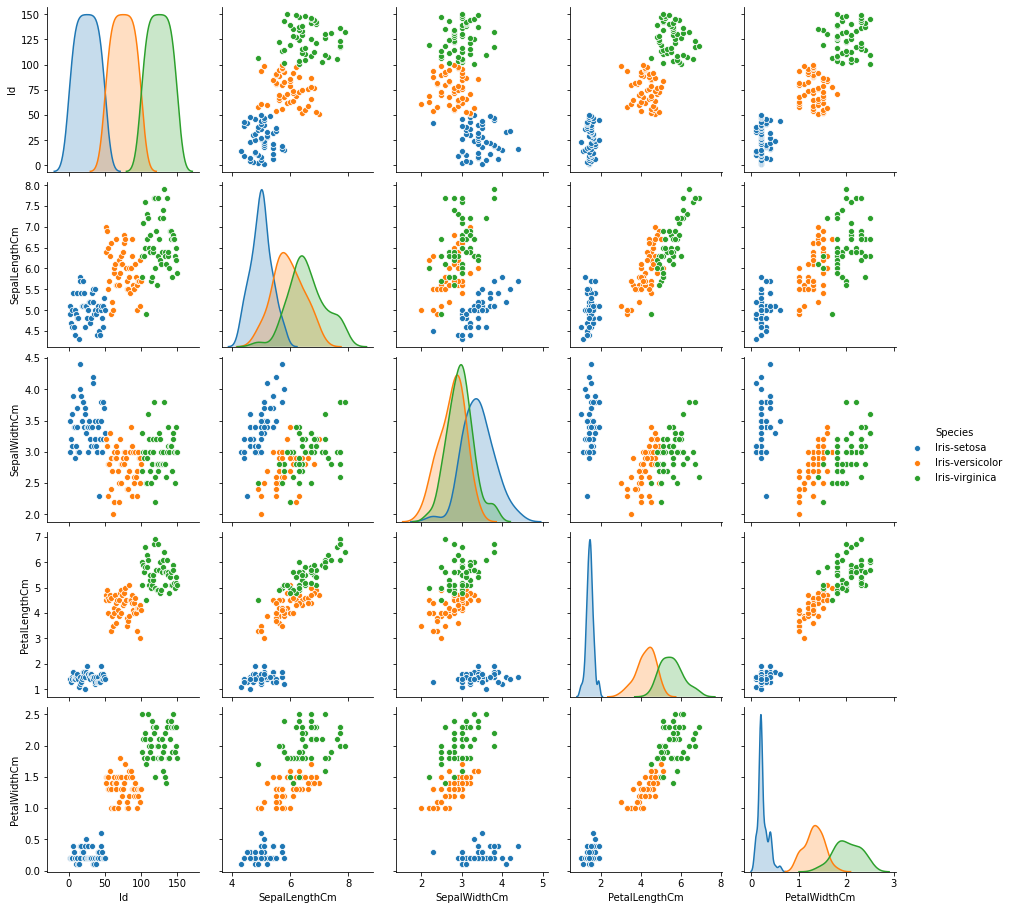

In [18]:
sns.pairplot(df, hue="Species", height=2.5)

# First, we need to find the optimum number of clusters for K-Means. Here we will use The Elbow Method to determine the value of k in K-Means.


# The Elbow Method
            In the Elbow method, we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different values of k and choose the k for which WCSS becomes first starts to diminish. In the plot of WCSS-versus-k, this is visible as an elbow. As the value of K increases, there will be fewer elements in the cluster. So average distortion will decrease. The lesser number of elements means closer to the centroid. So, the point where this distortion declines the most is the elbow point.

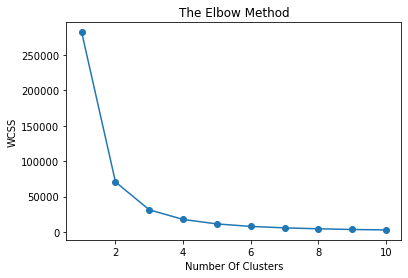

In [19]:
# Finding the optimum number of clusters for k-means classification
x = df.iloc[:,[0,1,2,3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#plotting the results on a line graph
# line graph will allow us to observe "The Elbow"
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS') # Within-Cluster-Sum of Squared Errors
plt.show()

# we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters are where the elbow occurs. This is when the within-cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 

# Here we can see that after 3 the drop in WCSS is minimal. So we choose 3 as the optimal number of clusters

In [20]:
# Applying kmeans to the dataset / Creating the kmeans classifier
# k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
kmeans = KMeans(n_clusters = 3, init= 'k-means++', max_iter = 300, n_init=10, random_state=0)

# Returns a Label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

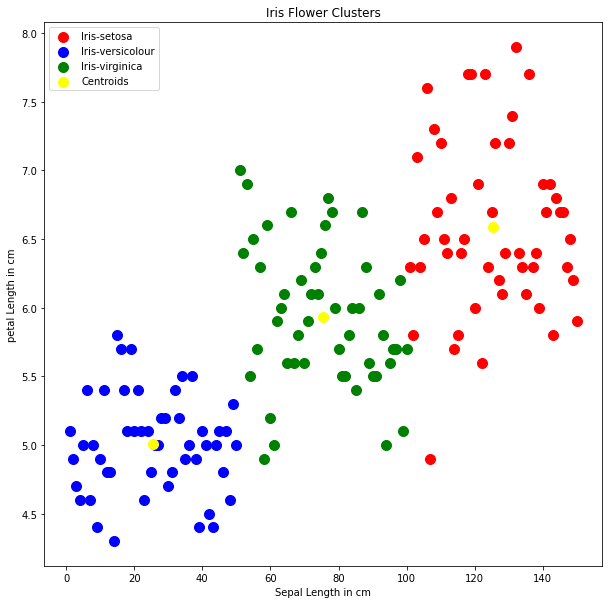

In [21]:
#Visualisation of clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c= 'red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c= 'blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c= 'green', label='Iris-virginica')

# plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='Yellow', label= 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('petal Length in cm')

plt.legend()
plt.show()


TASK2 COMPLETED
                            THANKU